# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data Exploration

In [2]:
df = pd.read_csv('assets/Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.shape

(545, 13)

In [5]:
df.info() # no nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


We can deduce that no null values in the data "No of non-null count in each col = no of rows"

In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
df.nunique().sort_values()

mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
prefarea              2
furnishingstatus      3
bathrooms             4
stories               4
parking               4
bedrooms              6
price               219
area                284
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

# Data Visualization

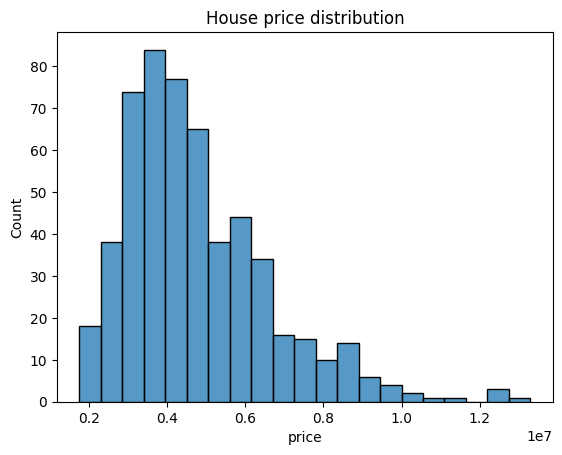

In [9]:
plt.title("House price distribution")
sns.histplot(df, x='price')

plt.show()

The plot of prices looks a lil bit right skewed

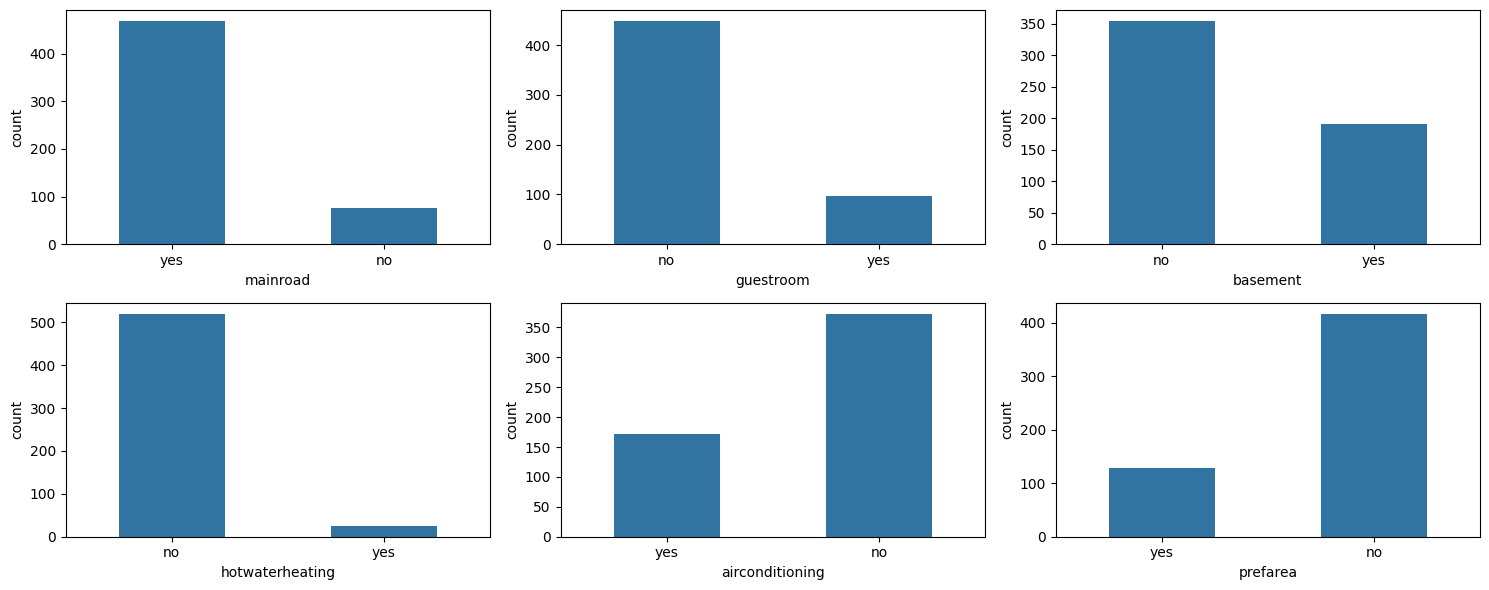

In [10]:
plt.figure(figsize=(15, 6))

plt.subplot(2, 3, 1)
sns.countplot(df, x='mainroad', width=0.5)

plt.subplot(2, 3, 2)
sns.countplot(df, x='guestroom', width=0.5)

plt.subplot(2, 3, 3)
sns.countplot(df, x='basement', width=0.5)

plt.subplot(2, 3, 4)
sns.countplot(df, x='hotwaterheating', width=0.5)

plt.subplot(2, 3, 5)
sns.countplot(df, x='airconditioning', width=0.5)

plt.subplot(2, 3, 6)
sns.countplot(df, x='prefarea', width=0.5)

plt.tight_layout()
plt.show()

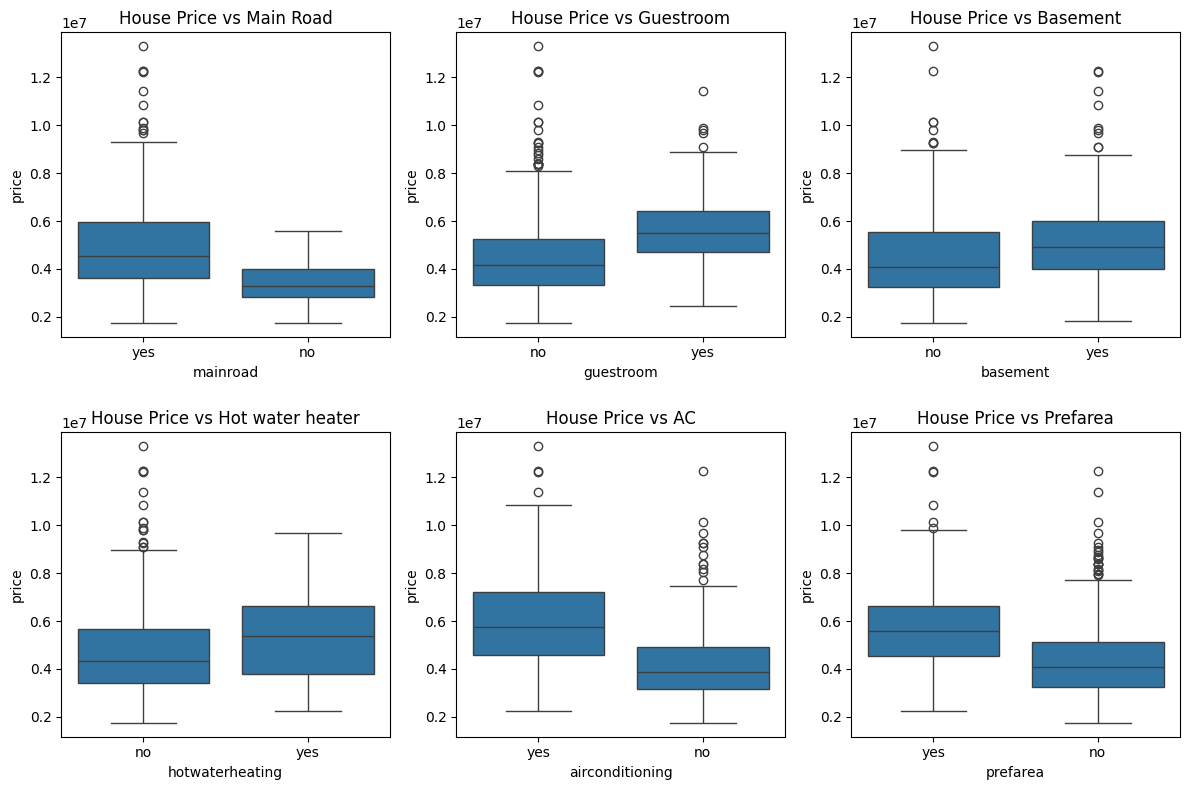

In [11]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
sns.boxplot(df, x='mainroad', y='price')
plt.title('House Price vs Main Road')

plt.subplot(2, 3, 2)
sns.boxplot(df, x='guestroom', y='price')
plt.title('House Price vs Guestroom')

plt.subplot(2, 3, 3)
sns.boxplot(df, x='basement', y='price')
plt.title('House Price vs Basement')

plt.subplot(2, 3, 4)
sns.boxplot(df, x='hotwaterheating', y='price')
plt.title('House Price vs Hot water heater')

plt.subplot(2, 3, 5)
sns.boxplot(df, x='airconditioning', y='price')
plt.title('House Price vs AC')

plt.subplot(2, 3, 6)
sns.boxplot(df, x='prefarea', y='price')
plt.title('House Price vs Prefarea')

plt.tight_layout()
plt.show()

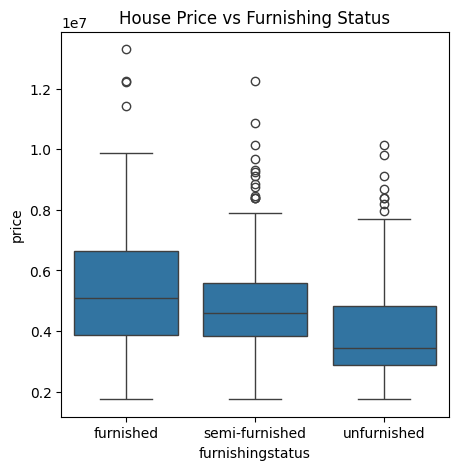

In [12]:
plt.figure(figsize=(5, 5))
sns.boxplot(df, x='furnishingstatus', y='price')
plt.title('House Price vs Furnishing Status')

plt.show()

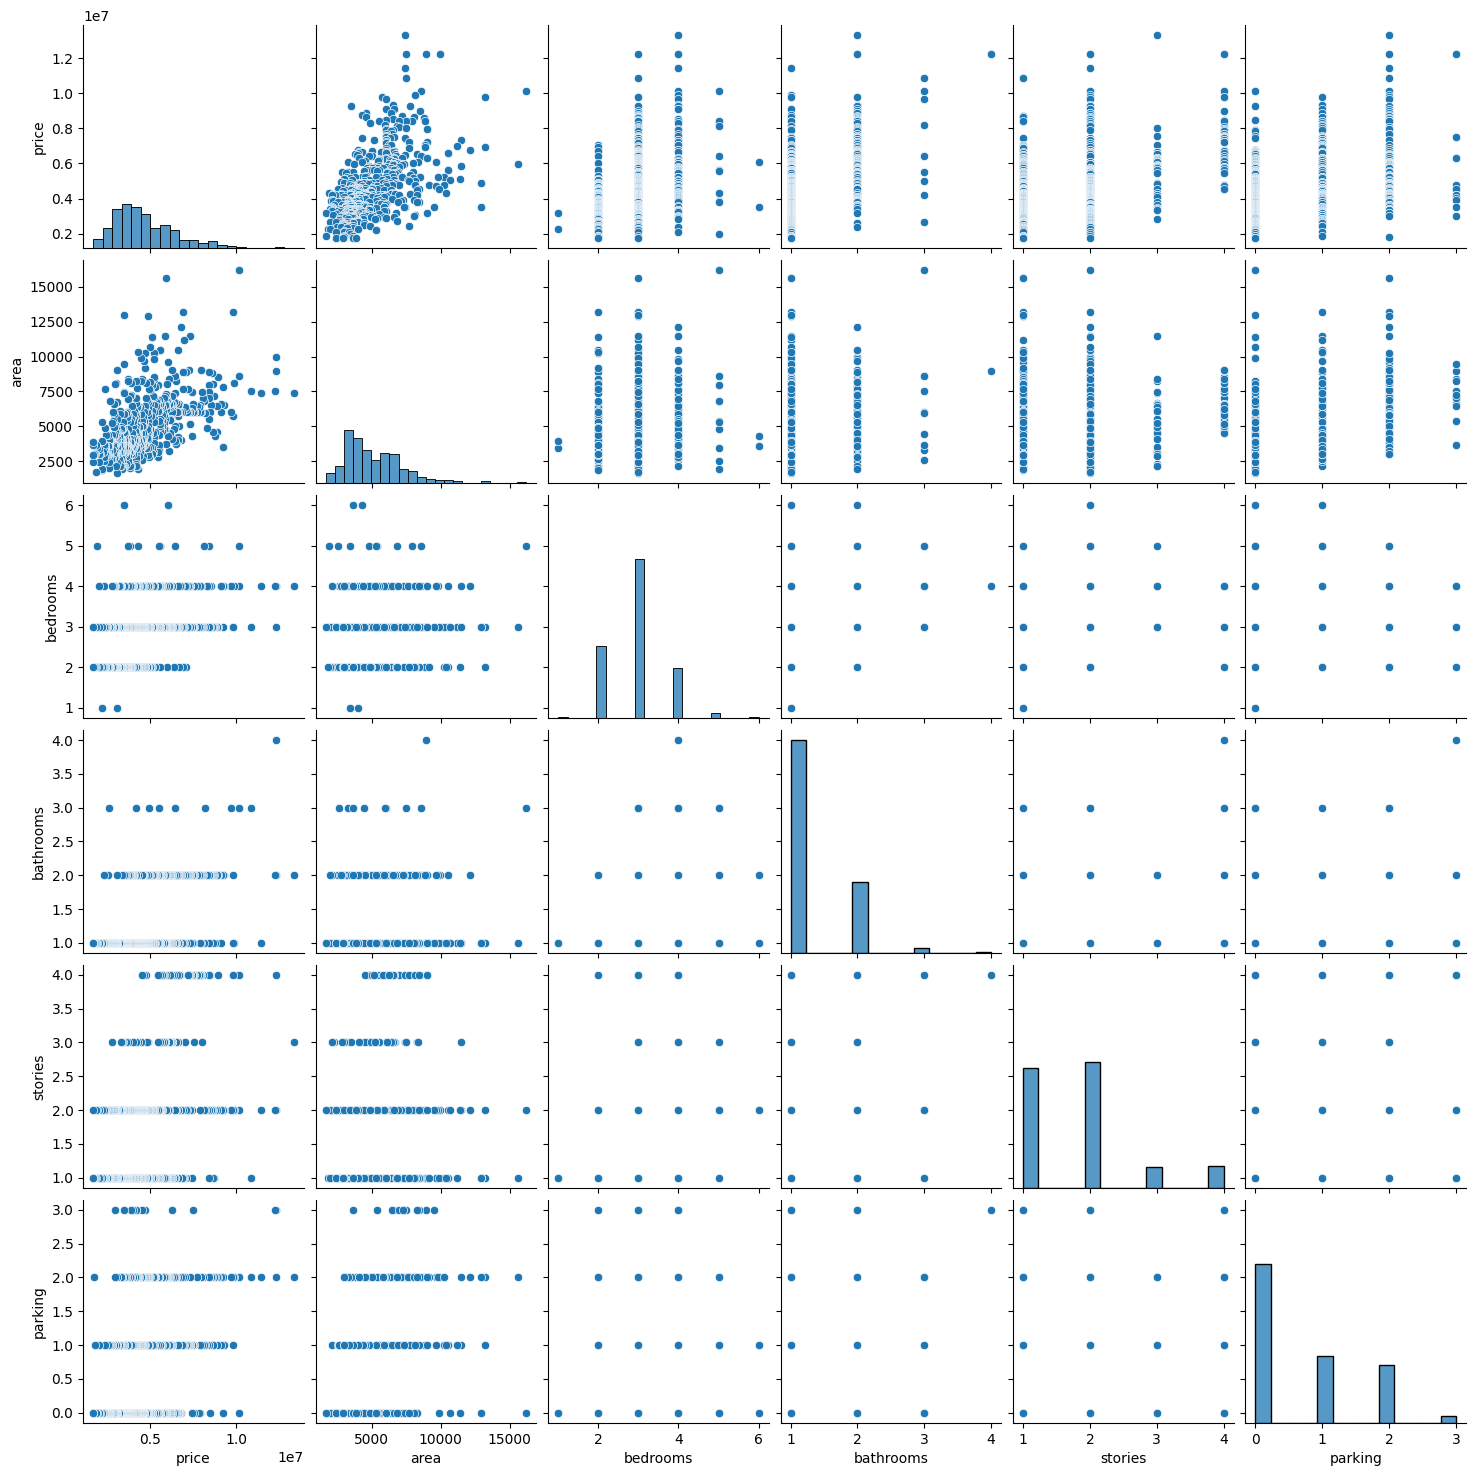

In [13]:
sns.pairplot(df)
plt.show()

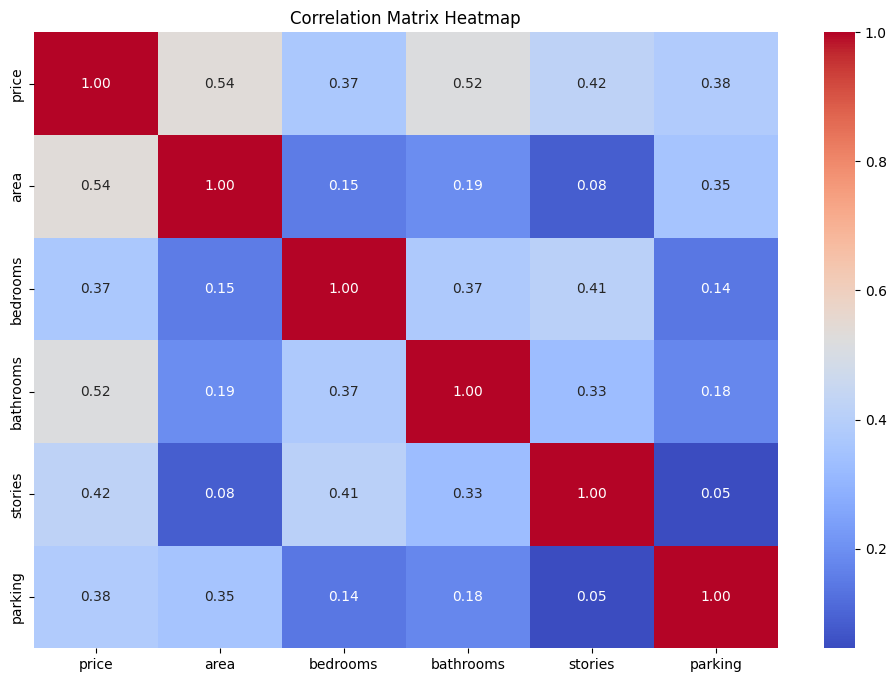

In [14]:
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Data Preprocessing

## Encoding

In [15]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [16]:
for col in df[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']].columns:
    df[col] = df[col].map(lambda x: 1 if x == 'yes' else 0)

In [17]:
df = pd.get_dummies(
    df, columns=['furnishingstatus'], prefix='', prefix_sep='')

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,True,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,True,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,False,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,True,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,True,False,False


In [18]:
df["furnished"] = df["furnished"].astype(int)
df["semi-furnished"] = df["semi-furnished"].astype(int)
df["unfurnished"] = df["unfurnished"].astype(int)

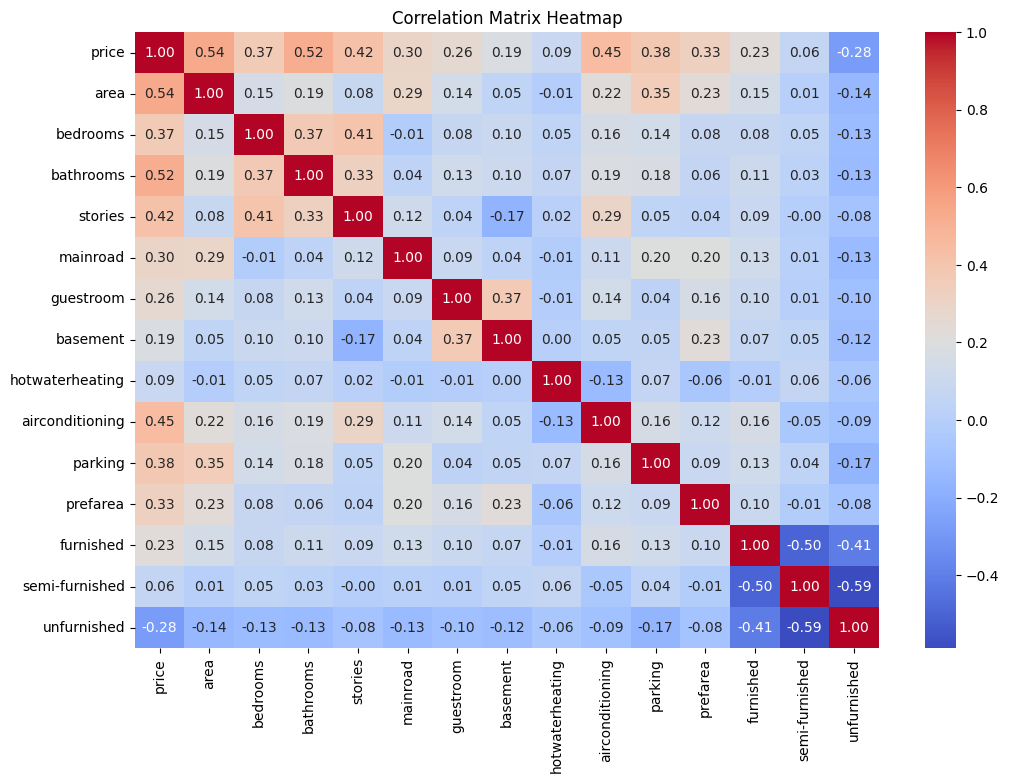

In [19]:
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

## Feature Engineering

In [20]:
df['total_rooms'] = df['bedrooms'] + df['bathrooms'] + df['guestroom']

binary_cols = ['guestroom', 'basement', 'mainroad', 
               'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_cols] = df[binary_cols].astype(int)

df['luxury_features'] = df[binary_cols].sum(axis=1)

df['area_per_story']=df['area']/df['stories']

In [21]:
df['price'] = np.log(df['price']) # to normalize the prices

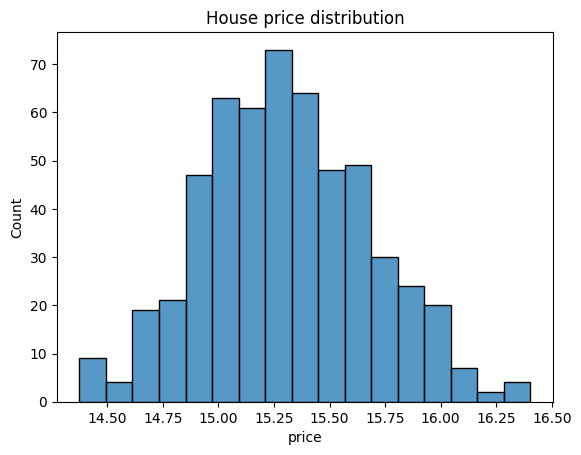

In [22]:
plt.title("House price distribution")
sns.histplot(df, x='price')

plt.show()

In [23]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished,total_rooms,luxury_features,area_per_story
0,16.403275,7420,4,2,3,1,0,0,0,1,2,1,1,0,0,6,3,2473.333333
1,16.321036,8960,4,4,4,1,0,0,0,1,3,0,1,0,0,8,2,2240.000000
2,16.321036,9960,3,2,2,1,0,1,0,0,2,1,0,1,0,5,3,4980.000000
3,16.318175,7500,4,2,2,1,0,1,0,1,3,1,1,0,0,6,4,3750.000000
4,16.250001,7420,4,1,2,1,1,1,0,1,2,0,1,0,0,6,4,3710.000000


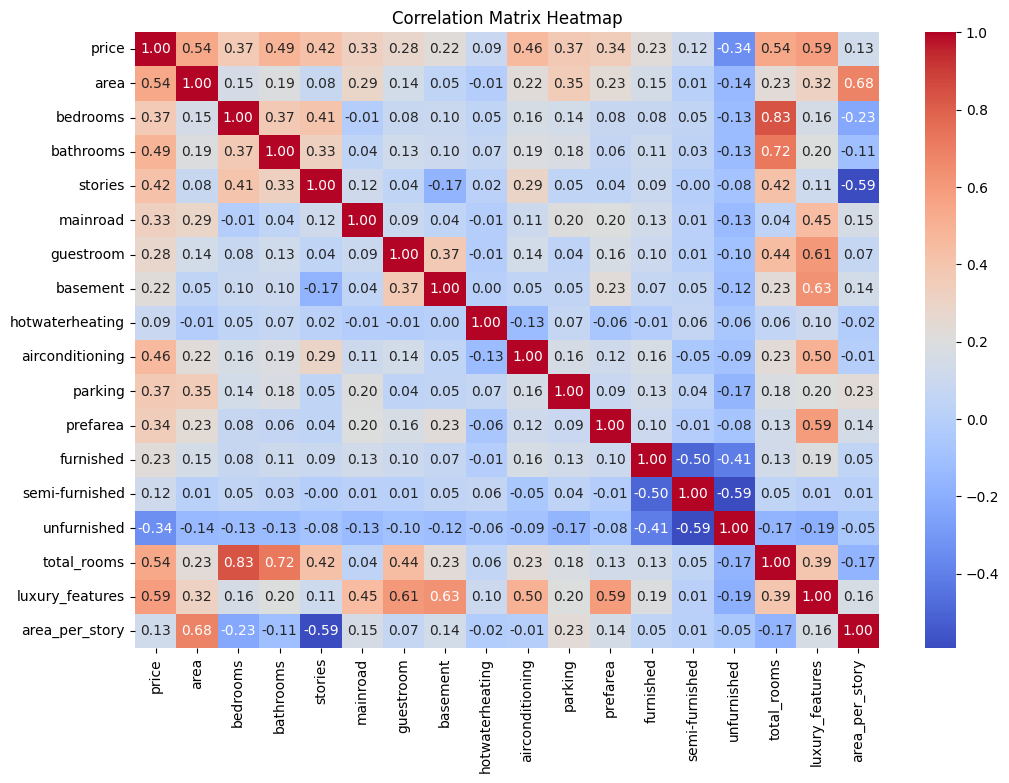

In [24]:
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [25]:
df.drop(columns=["area_per_story"], inplace=True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished,total_rooms,luxury_features
0,16.403275,7420,4,2,3,1,0,0,0,1,2,1,1,0,0,6,3
1,16.321036,8960,4,4,4,1,0,0,0,1,3,0,1,0,0,8,2
2,16.321036,9960,3,2,2,1,0,1,0,0,2,1,0,1,0,5,3
3,16.318175,7500,4,2,2,1,0,1,0,1,3,1,1,0,0,6,4
4,16.250001,7420,4,1,2,1,1,1,0,1,2,0,1,0,0,6,4


In [27]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished,total_rooms,luxury_features
0,16.403275,7420,4,2,3,1,0,0,0,1,2,1,1,0,0,6,3
1,16.321036,8960,4,4,4,1,0,0,0,1,3,0,1,0,0,8,2
2,16.321036,9960,3,2,2,1,0,1,0,0,2,1,0,1,0,5,3
3,16.318175,7500,4,2,2,1,0,1,0,1,3,1,1,0,0,6,4
4,16.250001,7420,4,1,2,1,1,1,0,1,2,0,1,0,0,6,4


In [35]:
dff=pd.read_csv('assets/Housing.csv')

In [36]:
dff.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [31]:
dff.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [37]:
dff.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [38]:
boolean_cols=['mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
        'prefarea']
dff[boolean_cols]=dff[boolean_cols].applymap(lambda x: True if x=='yes' else False)

C:\Users\Hosam\AppData\Local\Temp\ipykernel_13428\184031493.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dff[boolean_cols]=dff[boolean_cols].applymap(lambda x: True if x=='yes' else False)


In [39]:
dff['total_rooms'] = dff['bedrooms'] + dff['bathrooms'] + dff['guestroom']


In [40]:
binary_cols = ['guestroom', 'basement', 'mainroad', 
               'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_cols] = df[binary_cols].astype(int)

dff['luxury_features'] = dff[binary_cols].sum(axis=1)


In [41]:
dff.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,total_rooms,luxury_features
0,13300000,7420,4,2,3,True,False,False,False,True,2,True,furnished,6,3
1,12250000,8960,4,4,4,True,False,False,False,True,3,False,furnished,8,2
2,12250000,9960,3,2,2,True,False,True,False,False,2,True,semi-furnished,5,3
3,12215000,7500,4,2,2,True,False,True,False,True,3,True,furnished,6,4
4,11410000,7420,4,1,2,True,True,True,False,True,2,False,furnished,6,4


In [42]:
dff.to_csv('assets/Housing_cleaned.csv', index=False)